<a href="https://colab.research.google.com/github/sravika-reddy12/Sravika-Reddy_INFO5731_Spring2023/blob/main/In_class_exercise_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **The fifth in-class-exercise 


(20 points) The purpose of the question is to practice different machine learning algorithms for text classification as well as the performance evaluation. In addition, you are requried to conduct *10 fold cross validation (https://scikit-learn.org/stable/modules/cross_validation.html)* in the training. 

The dataset can be download from canvas. The dataset contains two files train data and test data for sentiment analysis in IMDB review, it has two categories: 1 represents positive and 0 represents negative. You need to split the training data into training and validate data (80% for training and 20% for validation, https://towardsdatascience.com/train-test-split-and-cross-validation-in-python-80b61beca4b6) and perform 10 fold cross validation while training the classifier. The final trained model was final evaluated on the test data. 

Algorithms:

(1) MultinominalNB

(2) SVM 

(3) KNN 

(4) Decision tree

(5) Random Forest

(6) XGBoost

(7) Word2Vec

(8) BERT

Evaluation measurement:

(1) Accuracy

(2) Recall

(3) Precison 

(4) F-1 score

In [ ]:

# Write your code here
#importing pandas
import pandas as pd
#matplot
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score



Training dataset

In [ ]:
with open("stsa-train.txt") as txtf:
    mylist = [line.rstrip('\n') for line in txtf]
 #list   
labels = []
text = []
#for loop
for i, line in enumerate(mylist):
    label = mylist[i][0]
    tex = mylist[i][1:]
    labels.append(label)
    text.append(tex)
#dataset
dataset = pd.DataFrame(list(zip(labels, text)),columns =['Reviews', 'Text'])
dataset.head()

,Reviews,Text
0,1,"a stirring , funny and finally transporting r..."
1,0,apparently reassembled from the cutting-room ...
2,0,they presume their audience wo n't sit still ...
3,1,this is a visually stunning rumination on lov...
4,1,jonathan parker 's bartleby should have been ...


In [ ]:
pip install nltk


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import nltk
#importing nltk
nltk.download('stopwords')

nltk.download('wordnet')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

Training data preprocessing

In [ ]:
import nltk
#importing nlk
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer,PorterStemmer
from nltk.corpus import stopwords
import re
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer() 

def preprocess(sentence):
    sentence=str(sentence)
    sentence = sentence.lower()
    sentence=sentence.replace('{html}',"") 
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, '', sentence)
    rem_url=re.sub(r'http\S+', '',cleantext)
    rem_num = re.sub('[0-9]+', '', rem_url)
    tokenizer = RegexpTokenizer(r'\w+')
    tokens = tokenizer.tokenize(rem_num)  
    filtered_words = [w for w in tokens if len(w) > 2 if not w in stopwords.words('english')]
    stem_words=[stemmer.stem(w) for w in filtered_words]
    lemma_words=[lemmatizer.lemmatize(w) for w in stem_words]
    return " ".join(filtered_words)

#dataset
dataset['cleanText']=dataset['Text'].map(lambda s:preprocess(s)) 
dataset.head()

,Reviews,Text,cleanText
0,1,"a stirring , funny and finally transporting r...",stirring funny finally transporting imagining ...
1,0,apparently reassembled from the cutting-room ...,apparently reassembled cutting room floor give...
2,0,they presume their audience wo n't sit still ...,presume audience sit still sociology lesson ho...
3,1,this is a visually stunning rumination on lov...,visually stunning rumination love memory histo...
4,1,jonathan parker 's bartleby should have been ...,jonathan parker bartleby end modern office ano...


Testing dataset

In [ ]:
with open("stsa-test.txt") as txtf:
    mylist_test = [line.rstrip('\n') for line in txtf]
    
labels_test = []
text_test = []

for i, line in enumerate(mylist_test):
    label_test = mylist_test[i][0]
    tex_test = mylist_test[i][1:]
    labels_test.append(label_test)
    text_test.append(tex_test)
#for loop

dataset_test = pd.DataFrame(list(zip(labels_test, text_test)),columns =['Reviews', 'Text'])
dataset_test.head()

,Reviews,Text
0,0,"no movement , no yuks , not much of anything ."
1,0,"a gob of drivel so sickly sweet , even the ea..."
2,0,"gangs of new york is an unapologetic mess , w..."
3,0,we never really feel involved with the story ...
4,1,this is one of polanski 's best films .


Testing data preprocessing

In [ ]:
#importing nltk
import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer,PorterStemmer
from nltk.corpus import stopwords
#import re
import re
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer() 
#def
def preprocess(sentence):
    sentence=str(sentence)
    sentence = sentence.lower()
    sentence=sentence.replace('{html}',"") 
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, '', sentence)
    rem_url=re.sub(r'http\S+', '',cleantext)
    rem_num = re.sub('[0-9]+', '', rem_url)
    tokenizer = RegexpTokenizer(r'\w+')
    tokens = tokenizer.tokenize(rem_num)  
    filtered_words = [w for w in tokens if len(w) > 2 if not w in stopwords.words('english')]
    stem_words=[stemmer.stem(w) for w in filtered_words]
    lemma_words=[lemmatizer.lemmatize(w) for w in stem_words]
    return " ".join(filtered_words)


dataset_test['cleanText']=dataset_test['Text'].map(lambda s:preprocess(s)) 
dataset_test.head()

,Reviews,Text,cleanText
0,0,"no movement , no yuks , not much of anything .",movement yuks much anything
1,0,"a gob of drivel so sickly sweet , even the ea...",gob drivel sickly sweet even eager consumers m...
2,0,"gangs of new york is an unapologetic mess , w...",gangs new york unapologetic mess whose saving ...
3,0,we never really feel involved with the story ...,never really feel involved story ideas remain ...
4,1,this is one of polanski 's best films .,one polanski best films


TF-IDF Vectorization

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer 
#importing TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(lowercase = False, analyzer='word')
train_tfidf = tfidf_vectorizer.fit_transform(dataset["cleanText"]).toarray()
test_tfidf = tfidf_vectorizer.transform(dataset_test["cleanText"]).toarray()
x_test = test_tfidf
y_test = dataset_test["Reviews"]

Data partitioning

In [ ]:
from sklearn.model_selection import train_test_split
#importing train_test_split
x_train, x_valid, y_train, y_valid = train_test_split(train_tfidf,dataset["Reviews"],test_size = 0.2, random_state = 202)

Algorithms


1.MultinominalNB

In [ ]:
from sklearn.naive_bayes import MultinomialNB
#importing multinomialNB
classifier = MultinomialNB()
model = classifier.fit(x_train, y_train) 
predictions_validation_set = classifier.predict(x_valid) 


from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
#printing statement
print ("Accuracy of the Naive Bayes model on validation set is : ", round(accuracy_score(y_valid, predictions_validation_set)*100),"%")
print ("Percision of the Naive Bayes model on validation set is : ", round(precision_score(y_valid, predictions_validation_set, pos_label='0')*100),"%")
print ("Recall of the Naive Bayes model on validation set is : ", round(recall_score(y_valid, predictions_validation_set, pos_label='0')*100),"%")
print ("F1 Score of the Naive Bayes model on validation set is : ", round(f1_score(y_valid, predictions_validation_set, pos_label='0')*100),"%")

Accuracy of the Naive Bayes model on validation set is :  78 %
Percision of the Naive Bayes model on validation set is :  83 %
Recall of the Naive Bayes model on validation set is :  69 %
F1 Score of the Naive Bayes model on validation set is :  76 %


In [ ]:
from sklearn.metrics import classification_report
#importing classification report
cr_naive_validation = classification_report(y_valid, predictions_validation_set)
#printing statement
print("Classification Report: ", "\n", "\n",cr_naive_validation)

Classification Report:  
 
               precision    recall  f1-score   support

           0       0.83      0.69      0.76       667
           1       0.75      0.87      0.81       717

    accuracy                           0.78      1384
   macro avg       0.79      0.78      0.78      1384
weighted avg       0.79      0.78      0.78      1384



In [ ]:
#importing cross_val_score
from sklearn.model_selection import cross_val_score
naive_accuracies_validation = cross_val_score(estimator = classifier, X = x_train, y = y_train, cv = 10)
#printing statement
print(f"Naive Bayes Model  10-fold cross validation score on training set is :  {round(naive_accuracies_validation.mean()*100)}%")

Naive Bayes Model  10-fold cross validation score on training set is :  77%


In [ ]:
predictions_test_set = classifier.predict(x_test) 
#printing statement
print ("Accuracy of the Naive Bayes model on test set is : ", round(accuracy_score(y_test, predictions_test_set)*100),"%")
print ("Percision of the Naive Bayes model on validation set is : ", round(precision_score(y_test, predictions_test_set, pos_label='0')*100),"%")
print ("Recall of the Naive Bayes model on validation set is : ", round(recall_score(y_test, predictions_test_set, pos_label='0')*100),"%")
print ("F1 Score of the Naive Bayes model on validation set is : ", round(f1_score(y_test, predictions_test_set, pos_label='0')*100),"%")

Accuracy of the Naive Bayes model on test set is :  79 %
Percision of the Naive Bayes model on validation set is :  86 %
Recall of the Naive Bayes model on validation set is :  71 %
F1 Score of the Naive Bayes model on validation set is :  78 %


In [ ]:
cr_naive_test = classification_report(y_test, predictions_test_set)
#printing statement
print("Classification Report: ", "\n", "\n",cr_naive_test)

Classification Report:  
 
               precision    recall  f1-score   support

           0       0.86      0.71      0.78       912
           1       0.75      0.88      0.81       909

    accuracy                           0.79      1821
   macro avg       0.80      0.79      0.79      1821
weighted avg       0.80      0.79      0.79      1821



In [ ]:
naive_accuracies_test = cross_val_score(estimator = classifier, X = x_test, y = y_test, cv = 10)
#printing statement
print(f"Naive Bayes Model 10-fold cross validation score on testing set is :  {round(naive_accuracies_test.mean()*100)}%")

Naive Bayes Model 10-fold cross validation score on testing set is :  73%


SVM

In [ ]:
from sklearn import svm
#importing svm
classifier_svm = svm.SVC()
model_svm = classifier_svm.fit(x_train, y_train) 
svm_predictions_validation_set = classifier_svm.predict(x_valid) 
#printing statement
print ("Accuracy of the SVM model on validation set is : ", round(accuracy_score(y_valid, svm_predictions_validation_set)*100),"%")
print ("Percision of the SVM model on validation set is : ", round(precision_score(y_valid, svm_predictions_validation_set, pos_label='0')*100),"%")
print ("Recall of the SVM model on validation set is : ", round(recall_score(y_valid, svm_predictions_validation_set, pos_label='0')*100),"%")
print ("F1 Score of the SVM model on validation set is : ", round(f1_score(y_valid, svm_predictions_validation_set, pos_label='0')*100),"%")

Accuracy of the SVM model on validation set is :  79 %
Percision of the SVM model on validation set is :  79 %
Recall of the SVM model on validation set is :  76 %
F1 Score of the SVM model on validation set is :  77 %


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
from sklearn.metrics import classification_report
#importing classification report
cr_svm_validation = classification_report(y_valid, svm_predictions_validation_set)
#printing statement
print("Classification Report: ", "\n", "\n",cr_svm_validation)

Classification Report:  
 
               precision    recall  f1-score   support

           0       0.79      0.76      0.77       667
           1       0.78      0.82      0.80       717

    accuracy                           0.79      1384
   macro avg       0.79      0.79      0.79      1384
weighted avg       0.79      0.79      0.79      1384



In [ ]:
from sklearn.model_selection import cross_val_score
#importing cross_val_score
svm_accuracies_validation = cross_val_score(estimator = classifier_svm, X = x_train, y = y_train, cv = 10)
#printing statement
print(f"SVM Model  10-fold cross validation score on training set is :  {round(svm_accuracies_validation.mean()*100)}%")

SVM Model  10-fold cross validation score on training set is :  77%


In [ ]:
svm_predictions_test_set = classifier_svm.predict(x_test) 
#printing statement
print ("Accuracy of the SVM model on test set is : ", round(accuracy_score(y_test, svm_predictions_test_set)*100),"%")
print ("Percision of the SVM model on validation set is : ", round(precision_score(y_test, svm_predictions_test_set, pos_label='0')*100),"%")
print ("Recall of the SVM model on validation set is : ", round(recall_score(y_test, svm_predictions_test_set, pos_label='0')*100),"%")
print ("F1 Score of the SVM model on validation set is : ", round(f1_score(y_test, svm_predictions_test_set, pos_label='0')*100),"%")

Accuracy of the SVM model on test set is :  79 %
Percision of the SVM model on validation set is :  82 %
Recall of the SVM model on validation set is :  75 %
F1 Score of the SVM model on validation set is :  78 %


In [ ]:
cr_svm_test = classification_report(y_test, svm_predictions_test_set)
#printing statement
print("Classification Report: ", "\n", "\n",cr_svm_test)

Classification Report:  
 
               precision    recall  f1-score   support

           0       0.82      0.75      0.78       912
           1       0.77      0.84      0.80       909

    accuracy                           0.79      1821
   macro avg       0.80      0.79      0.79      1821
weighted avg       0.80      0.79      0.79      1821



In [ ]:
svm_accuracies_test = cross_val_score(estimator = classifier_svm, X = x_test, y = y_test, cv = 10)
#printing statement
print(f"SVM Model 10-fold cross validation score on testing set is :  {round(svm_accuracies_test.mean()*100)}%")

SVM Model 10-fold cross validation score on testing set is :  72%


KNN


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
#importing KNeighbors classifier
classifier_knn = KNeighborsClassifier(n_neighbors = 15)
model_knn = classifier_knn.fit(x_train, y_train) 
knn_predictions_validation_set = classifier_knn.predict(x_valid) 
#printing statement
print ("Accuracy of the KNN model on validation set is : ", round(accuracy_score(y_valid, knn_predictions_validation_set)*100),"%")
print ("Percision of the KNN model on validation set is : ", round(precision_score(y_valid, knn_predictions_validation_set, pos_label='0')*100),"%")
print ("Recall of the KNN model on validation set is : ", round(recall_score(y_valid, knn_predictions_validation_set, pos_label='0')*100),"%")
print ("F1 Score of the KNN model on validation set is : ", round(f1_score(y_valid, knn_predictions_validation_set, pos_label='0')*100),"%")

Accuracy of the KNN model on validation set is :  74 %
Percision of the KNN model on validation set is :  71 %
Recall of the KNN model on validation set is :  78 %
F1 Score of the KNN model on validation set is :  74 %


In [ ]:
from sklearn.metrics import classification_report
#importing classification report
cr_knn_validation = classification_report(y_valid, knn_predictions_validation_set)
#printing statement
print("Classification Report: ", "\n", "\n",cr_knn_validation)

Classification Report:  
 
               precision    recall  f1-score   support

           0       0.71      0.78      0.74       667
           1       0.77      0.71      0.74       717

    accuracy                           0.74      1384
   macro avg       0.74      0.74      0.74      1384
weighted avg       0.74      0.74      0.74      1384



In [ ]:
from sklearn.model_selection import cross_val_score
#importing cross_val_score
knn_accuracies_validation = cross_val_score(estimator = classifier_knn, X = x_train, y = y_train, cv = 10)
#printing statement
print(f"KNN Model  10-fold cross validation score on training set is :  {round(knn_accuracies_validation.mean()*100)}%")

KNN Model  10-fold cross validation score on training set is :  70%


In [ ]:
knn_predictions_test_set = classifier_knn.predict(x_test) 
#printing statement
print ("Accuracy of the KNN model on test set is : ", round(accuracy_score(y_test, knn_predictions_test_set)*100),"%")
print ("Percision of the KNN model on validation set is : ", round(precision_score(y_test, knn_predictions_test_set, pos_label='0')*100),"%")
print ("Recall of the KNN model on validation set is : ", round(recall_score(y_test, knn_predictions_test_set, pos_label='0')*100),"%")
print ("F1 Score of the KNN model on validation set is : ", round(f1_score(y_test, knn_predictions_test_set, pos_label='0')*100),"%")

In [ ]:
cr_knn_test = classification_report(y_test, knn_predictions_test_set)
print("Classification Report: ", "\n", "\n",cr_knn_test)

NameError: ignored

In [ ]:
#print
knn_accuracies_test = cross_val_score(estimator = classifier_knn, X = x_test, y = y_test, cv = 10)
#printing statement
print(f"KNN Model 10-fold cross validation score on testing set is :  {round(knn_accuracies_test.mean()*100)}%")

KNN Model 10-fold cross validation score on testing set is :  63%


Decison Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
#importing decision tree classifier
classifier_dt = DecisionTreeClassifier()
model_dt = classifier_dt.fit(x_train, y_train) 
dt_predictions_validation_set = classifier_dt.predict(x_valid) 
#printing statement
print ("Accuracy of the Decison Tree Classifier model on validation set is : ", round(accuracy_score(y_valid, dt_predictions_validation_set)*100),"%")
print ("Percision of the Decison Tree Classifier model on validation set is : ", round(precision_score(y_valid, dt_predictions_validation_set, pos_label='0')*100),"%")
print ("Recall of the Decison Tree Classifier model on validation set is : ", round(recall_score(y_valid, dt_predictions_validation_set, pos_label='0')*100),"%")


Accuracy of the Decison Tree Classifier model on validation set is :  64 %
Percision of the Decison Tree Classifier model on validation set is :  61 %
Recall of the Decison Tree Classifier model on validation set is :  70 %


In [ ]:
from sklearn.metrics import classification_report
#importing classification report
cr_dt_validation = classification_report(y_valid, dt_predictions_validation_set)
#printing statement
print("Classification Report: ", "\n", "\n",cr_dt_validation)

Classification Report:  
 
               precision    recall  f1-score   support

           0       0.61      0.70      0.65       667
           1       0.68      0.59      0.63       717

    accuracy                           0.64      1384
   macro avg       0.64      0.64      0.64      1384
weighted avg       0.65      0.64      0.64      1384



In [ ]:
from sklearn.model_selection import cross_val_score
dt_accuracies_validation = cross_val_score(estimator = classifier_dt, X = x_train, y = y_train, cv = 10)
#printing statement
print(f"Decison Tree Classifier Model  10-fold cross validation score on training set is :  {round(dt_accuracies_validation.mean()*100)}%")

Decison Tree Classifier Model  10-fold cross validation score on training set is :  66%


In [ ]:
dt_predictions_test_set = classifier_dt.predict(x_test) 
#printing statement
print ("Accuracy of the Decison Tree Classifier model on test set is : ", round(accuracy_score(y_test, dt_predictions_test_set)*100),"%")
print ("Percision of the Decison Tree Classifier model on validation set is : ", round(precision_score(y_test, dt_predictions_test_set, pos_label='0')*100),"%")
print ("Recall of the Decison Tree Classifier model on validation set is : ", round(recall_score(y_test, dt_predictions_test_set, pos_label='0')*100),"%")
print ("F1 Score of the Decison Tree Classifier model on validation set is : ", round(f1_score(y_test, dt_predictions_test_set, pos_label='0')*100),"%")

Accuracy of the Decison Tree Classifier model on test set is :  66 %
Percision of the Decison Tree Classifier model on validation set is :  66 %
Recall of the Decison Tree Classifier model on validation set is :  69 %
F1 Score of the Decison Tree Classifier model on validation set is :  67 %


In [ ]:
cr_dt_test = classification_report(y_test, dt_predictions_test_set)
#printing statement
print("Classification Report: ", "\n", "\n",cr_dt_test)

Classification Report:  
 
               precision    recall  f1-score   support

           0       0.66      0.69      0.67       912
           1       0.67      0.64      0.65       909

    accuracy                           0.66      1821
   macro avg       0.66      0.66      0.66      1821
weighted avg       0.66      0.66      0.66      1821



In [ ]:
dt_accuracies_test = cross_val_score(estimator = classifier_dt, X = x_test, y = y_test, cv = 10)
#printing statement
print(f"Decison Tree Classifier Model 10-fold cross validation score on testing set is :  {round(dt_accuracies_test.mean()*100)}%")

Decison Tree Classifier Model 10-fold cross validation score on testing set is :  62%


Randomforest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
#importing randomforestclassifier
classifier_rf = RandomForestClassifier()
model_rf = classifier_rf.fit(x_train, y_train) 
rf_predictions_validation_set = classifier_rf.predict(x_valid) 
#printing statement
print ("Accuracy of the Random Forest Classifier model on validation set is : ", round(accuracy_score(y_valid, rf_predictions_validation_set)*100),"%")
print ("Percision of the Random Forest Classifier model on validation set is : ", round(precision_score(y_valid, rf_predictions_validation_set, pos_label='0')*100),"%")
print ("Recall of the Random Forest Classifier model on validation set is : ", round(recall_score(y_valid, rf_predictions_validation_set, pos_label='0')*100),"%")


Accuracy of the Random Forest Classifier model on validation set is :  74 %
Percision of the Random Forest Classifier model on validation set is :  72 %
Recall of the Random Forest Classifier model on validation set is :  74 %


In [ ]:
from sklearn.metrics import classification_report
#importing classification report
cr_rf_validation = classification_report(y_valid, rf_predictions_validation_set)
#printing statement
print("Classification Report: ", "\n", "\n",cr_rf_validation)

Classification Report:  
 
               precision    recall  f1-score   support

           0       0.72      0.74      0.73       667
           1       0.75      0.74      0.74       717

    accuracy                           0.74      1384
   macro avg       0.74      0.74      0.74      1384
weighted avg       0.74      0.74      0.74      1384



In [ ]:
from sklearn.model_selection import cross_val_score
#importing cross_val_score
rf_accuracies_validation = cross_val_score(estimator = classifier_rf, X = x_train, y = y_train, cv = 10)
#printing statement
print(f"Decison Random Forest Model  10-fold cross validation score on training set is :  {round(rf_accuracies_validation.mean()*100)}%")

Decison Random Forest Model  10-fold cross validation score on training set is :  72%


In [ ]:
rf_predictions_test_set = classifier_rf.predict(x_test) 
#printing statement
print ("Accuracy of the Random Forest Classifier model on test set is : ", round(accuracy_score(y_test, rf_predictions_test_set)*100),"%")
print ("Percision of the Random Forest Classifier model on validation set is : ", round(precision_score(y_test, rf_predictions_test_set, pos_label='0')*100),"%")
print ("Recall of the Random Forest Classifier model on validation set is : ", round(recall_score(y_test, rf_predictions_test_set, pos_label='0')*100),"%")
print ("F1 Score of the Random Forest Classifier model on validation set is : ", round(f1_score(y_test, rf_predictions_test_set, pos_label='0')*100),"%")

Accuracy of the Random Forest Classifier model on test set is :  74 %
Percision of the Random Forest Classifier model on validation set is :  73 %
Recall of the Random Forest Classifier model on validation set is :  76 %
F1 Score of the Random Forest Classifier model on validation set is :  75 %


In [ ]:
cr_rf_test = classification_report(y_test, rf_predictions_test_set)
#printing statement
print("Classification Report: ", "\n", "\n",cr_rf_test)

Classification Report:  
 
               precision    recall  f1-score   support

           0       0.73      0.76      0.75       912
           1       0.75      0.72      0.73       909

    accuracy                           0.74      1821
   macro avg       0.74      0.74      0.74      1821
weighted avg       0.74      0.74      0.74      1821



In [ ]:
rf_accuracies_test = cross_val_score(estimator = classifier_rf, X = x_test, y = y_test, cv = 10)
#printing statement
print(f"Random Forest Classifier Model 10-fold cross validation score on testing set is :  {round(rf_accuracies_test.mean()*100)}%")

Random Forest Classifier Model 10-fold cross validation score on testing set is :  65%


XGBoost

In [ ]:
from xgboost import XGBClassifier
#importing XGBC classifier
classifier_xgb = XGBClassifier()
model_xgb = classifier_xgb.fit(x_train, y_train) 
xgb_predictions_validation_set = classifier_xgb.predict(x_valid) 
#printing statement
print ("Accuracy of the XGBoost Classifier model on validation set is : ", round(accuracy_score(y_valid, xgb_predictions_validation_set)*100),"%")
print ("Percision of the XGBoost Classifier model on validation set is : ", round(precision_score(y_valid, xgb_predictions_validation_set, pos_label='0')*100),"%")
print ("Recall of the XGBoost Classifier model on validation set is : ", round(recall_score(y_valid, xgb_predictions_validation_set, pos_label='0')*100),"%")
print ("F1 Score of the XGBoost Classifier model on validation set is : ", round(f1_score(y_valid, xgb_predictions_validation_set, pos_label='0')*100),"%")

In [ ]:
from sklearn.metrics import classification_report
#importing classification_report
cr_xgb_validation = classification_report(y_valid, xgb_predictions_validation_set)
#printing statement
print("Classification Report: ", "\n", "\n",cr_xgb_validation)

In [ ]:
from sklearn.model_selection import cross_val_score
xgb_accuracies_validation = cross_val_score(estimator = classifier_xgb, X = x_train, y = y_train, cv = 10)
#printing statement
print(f"XGBoost Model  10-fold cross validation score on training set is :  {round(xgb_accuracies_validation.mean()*100)}%")

In [ ]:
#prediction test
#printing statement
xgb_predictions_test_set = classifier_xgb.predict(x_test) 
print ("Accuracy of the XGBoost Classifier model on test set is : ", round(accuracy_score(y_test, xgb_predictions_test_set)*100),"%")
print ("Percision of the XGBoost Classifier model on validation set is : ", round(precision_score(y_test, xgb_predictions_test_set, pos_label='0')*100),"%")
print ("Recall of the XGBoost Classifier model on validation set is : ", round(recall_score(y_test, xgb_predictions_test_set, pos_label='0')*100),"%")
print ("F1 Score of the XGBoost Classifier model on validation set is : ", round(f1_score(y_test, xgb_predictions_test_set, pos_label='0')*100),"%")

In [ ]:
cr_xgb_test = classification_report(y_test, xgb_predictions_test_set)
#printing statement
print("Classification Report: ", "\n", "\n",cr_xgb_test)

In [ ]:
xgb_accuracies_test = cross_val_score(estimator = classifier_xgb, X = x_test, y = y_test, cv = 10)
#printing statement
print(f"XGBoost Classifier Model 10-fold cross validation score on testing set is :  {round(xgb_accuracies_test.mean()*100)}%")

(20 points) The purpose of the question is to practice different machine learning algorithms for text clustering
Please downlad the dataset by using the following link.  https://www.kaggle.com/PromptCloudHQ/amazon-reviews-unlocked-mobile-phones
(You can also use different text data which you want)

Apply the listed clustering methods to the dataset:

K-means

DBSCAN

Hierarchical clustering

Word2Vec

BERT

You can refer to of the codes from  the follwing link below. 
https://www.kaggle.com/karthik3890/text-clustering 

K MEANS

In [2]:
# K means clustering
from pandas.core.groupby.groupby import sample
import pandas as pd
#importing drive
from google.colab import drive
drive.mount('/content/gdrive')
sample = pd.read_csv('/content/gdrive/MyDrive/Amazon_Unlocked_Mobile.csv')
sample.head

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


<bound method NDFrame.head of                                              Product Name Brand Name   Price  \
0       "CLEAR CLEAN ESN" Sprint EPIC 4G Galaxy SPH-D7...    Samsung  199.99   
1       "CLEAR CLEAN ESN" Sprint EPIC 4G Galaxy SPH-D7...    Samsung  199.99   
2       "CLEAR CLEAN ESN" Sprint EPIC 4G Galaxy SPH-D7...    Samsung  199.99   
3       "CLEAR CLEAN ESN" Sprint EPIC 4G Galaxy SPH-D7...    Samsung  199.99   
4       "CLEAR CLEAN ESN" Sprint EPIC 4G Galaxy SPH-D7...    Samsung  199.99   
...                                                   ...        ...     ...   
413835  Samsung Convoy U640 Phone for Verizon Wireless...    Samsung   79.95   
413836  Samsung Convoy U640 Phone for Verizon Wireless...    Samsung   79.95   
413837  Samsung Convoy U640 Phone for Verizon Wireless...    Samsung   79.95   
413838  Samsung Convoy U640 Phone for Verizon Wireless...    Samsung   79.95   
413839  Samsung Convoy U640 Phone for Verizon Wireless...    Samsung   79.95   

        R

<Axes: ylabel='count'>

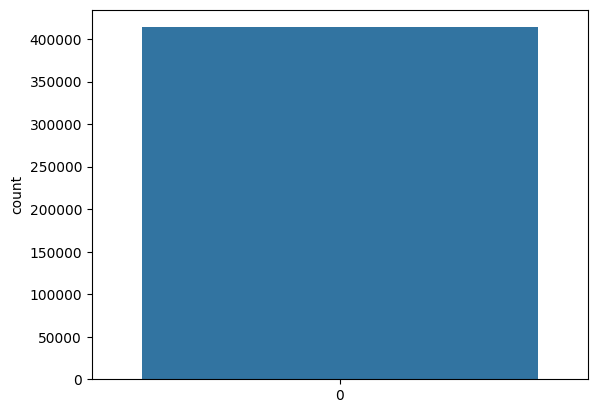

In [3]:
import seaborn as sns
sns.countplot(sample.Rating)


In [4]:
def partition(x):
    if x < 3:
        return 'negative'
    return 'positive'

#changing reviews with score less than 3 to be positive
actualScore = sample['Rating']
#positive Negative
positiveNegative = actualScore.map(partition) 
sample['Rating'] = positiveNegative
sample.head

<bound method NDFrame.head of                                              Product Name Brand Name   Price  \
0       "CLEAR CLEAN ESN" Sprint EPIC 4G Galaxy SPH-D7...    Samsung  199.99   
1       "CLEAR CLEAN ESN" Sprint EPIC 4G Galaxy SPH-D7...    Samsung  199.99   
2       "CLEAR CLEAN ESN" Sprint EPIC 4G Galaxy SPH-D7...    Samsung  199.99   
3       "CLEAR CLEAN ESN" Sprint EPIC 4G Galaxy SPH-D7...    Samsung  199.99   
4       "CLEAR CLEAN ESN" Sprint EPIC 4G Galaxy SPH-D7...    Samsung  199.99   
...                                                   ...        ...     ...   
413835  Samsung Convoy U640 Phone for Verizon Wireless...    Samsung   79.95   
413836  Samsung Convoy U640 Phone for Verizon Wireless...    Samsung   79.95   
413837  Samsung Convoy U640 Phone for Verizon Wireless...    Samsung   79.95   
413838  Samsung Convoy U640 Phone for Verizon Wireless...    Samsung   79.95   
413839  Samsung Convoy U640 Phone for Verizon Wireless...    Samsung   79.95   

         

In [5]:
sample["Rating"].value_counts()

positive    316762
negative     97078
Name: Rating, dtype: int64

In [6]:
#To drop the duplicate values
sorted_data=sample.sort_values('Reviews', axis=0, ascending=True, inplace=False, kind='quicksort', na_position='last')
final=sorted_data.drop_duplicates(subset={"Product Name","Brand Name","Price","Rating","Reviews"}, keep='first', inplace=False)
final.shape

(336769, 6)

In [7]:
(final['Reviews'].size*1.0)/(sample['Reviews'].size*1.0)*100

81.3766189831819

In [9]:
import seaborn as sns
final['Reviews'].value_counts()

Good                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         1092
Excellent                                                                                                                                                                                             

In [10]:
# find sentences containing HTML tags
import re
i=0;
#for loop
#if statement
#break
for sent in final['Reviews'].values:
    if (len(re.findall('<.*?>', sent))):
        print(i)
        print(sent)
        break;
    i += 1;

27
"Excellent! Ordered on 4/7/09, rec'd 4/10/09 - In perfect working order, packaged well, shipped fast. Exactly as described. Buy with confidence! Beautiful phones! I could not be happier! KRZR K1 by Motorola for $105 (I bought 2) - Exceptional products delivered in record time, in absolutely outstanding condition. More than I hoped for, better than I expected. I will recommend them to friends! One for me, one for the wife. A lot of good solid technology in a small package. I'm very pleased with everything the phone promises and delivers. My wife likes the small form factor (we had RAZR's) and the intuitive commands. Great phones! <Sidenote>: no toys, no accessories, not even a memory chip, but compared to $280 through a carrier, $105 is worth buying all that on your own dime." You're only going to upgrade all that stuff anyway, so it's well worth it!


In [11]:
import nltk
nltk.download('stopwords')
#importing stopwords
from nltk.corpus import stopwords
sno = nltk.stem.SnowballStemmer('english') 
#initialising the snowball stemmer which is developed in recent years
stop=set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [12]:
#function to clean the word of any html-tags
def cleanhtml(sentence): 
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, ' ', sentence)
    return cleantext
#function to clean the word of any html-tags
#function to clean the word of any punctuation or special characters

def cleanpunc(sentence): 
    cleaned = re.sub(r'[?|!|\'|"|#]',r'',sentence)
    cleaned = re.sub(r'[.|,|)|(|\|/]',r' ',cleaned)
    return  cleaned
print(stop)

{'off', 'doing', 'below', 'theirs', "you've", 'his', 'isn', 'other', 'not', 'through', "don't", 'than', 'you', 'whom', 'needn', 'out', 'do', 'this', 'few', "it's", 'me', 'in', 'so', 'an', 'nor', "didn't", 'them', 'during', 'above', 'with', 'haven', 'ourselves', 'what', 'been', 'd', 'it', 'we', 'yourselves', 'a', 'same', "shan't", 'yourself', 'how', 'ma', 'if', 'only', 'didn', 'then', 've', 'm', 'have', 'further', 'wouldn', "mustn't", 'more', 'between', 'shouldn', 'up', 'of', "haven't", 'some', 'her', 'hers', 'having', 'had', 'each', 'yours', 'where', 're', 'why', 'no', 'because', 'mightn', 'myself', 'he', 'for', "aren't", "needn't", 'hadn', 'from', 'there', 'shan', 'should', 'can', "won't", 'our', 'into', 'now', 'too', "she's", 'their', "wouldn't", 'at', "should've", 'i', 'are', 'about', "hadn't", "you'd", "shouldn't", 'she', 'themselves', 'to', "doesn't", 'such', 'him', 'does', 'while', 'here', 'any', 'did', 'those', 'who', "isn't", 'was', 'both', 'as', 't', 'y', 'that', 'when', 'am',

In [13]:
i=0
str1=' '
final_string=[]
all_positive_words=[] #  to store words from +ve reviews here
all_negative_words=[] #  to store words from -ve reviews here.
s=''
for sent in final['Reviews'].values:
    filtered_sentence=[]
    for w in str(sent).split(): 
        for cleaned_words in cleanpunc(w).split():
            if((cleaned_words.isalpha()) & (len(cleaned_words)>2)):    
                if(cleaned_words.lower() not in stop):
                    s=(sno.stem(cleaned_words.lower())).encode('utf8')
                    filtered_sentence.append(s)
                    if (final['Rating'].values)[i] == 'positive':
                      all_positive_words.append(s) # to list of all words used to describe positive reviews
                    if(final['Rating'].values)[i] == 'negative':
                        all_negative_words.append(s) # to list of all words used to describe negative reviews reviews
                else:
                    continue
            else:
                continue 
    # to print(filtered_sentence)
    str1 = b" ".join(filtered_sentence) # to final string of cleaned words 
    final_string.append(str1)
    i+=1 

In [14]:
# Create a column for cleane text
final['CleanedText']=final_string  
final['CleanedText']=final['CleanedText'].str.decode("utf-8")
final.shape

<ipython-input-14-6a2ddb2f7499>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final['CleanedText']=final_string
<ipython-input-14-6a2ddb2f7499>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final['CleanedText']=final['CleanedText'].str.decode("utf-8")


(336769, 7)

In [15]:
# Generating bag of words features.
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()
bow = count_vect.fit_transform(final['CleanedText'].values)
bow.shape

(336769, 46655)

In [16]:
bow
terms = count_vect.get_feature_names_out

In [17]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters = 10,init='k-means++',random_state=99)
model.fit(bow)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=10, random_state=99)

In [18]:
labels = model.labels_
cluster_center=model.cluster_centers_
cluster_center

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [2.85295852e-05, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 4.75493086e-05, 0.00000000e+00],
       [1.61281998e-04, 6.45127993e-06, 1.29025599e-05, ...,
        6.45127993e-06, 6.45127993e-06, 6.45127993e-06],
       ...,
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [3.41576718e-05, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [20]:
from sklearn import metrics
silhouette_score = metrics.silhouette_score(bow, labels, metric='euclidean')

In [21]:
silhouette_score

0.02295940132110638

In [22]:
df = final
df['Bow Clus Label'] = model.labels_ # the last column you can see the label numebers
df.head(2)

<ipython-input-22-c7c2d0a591d7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Bow Clus Label'] = model.labels_ # the last column you can see the label numebers


,Product Name,Brand Name,Price,Rating,Reviews,Review Votes,CleanedText,Bow Clus Label
262126,"Nokia 7705 Twist Phone, Black (Verizon Wireles...",Nokia,87.99,positive,! am very satisfied with this phone. I had the...,1.0,satisfi phone phone broke year use abus like m...,1
81591,"ASUS ZenFone 2 Unlocked Cellphone, 64GB, Black...",Asus,235.16,positive,"!!!! Great phone move fast everything , but th...",0.0,great phone move fast everyth batteri poor,1


In [23]:
df.groupby(['Bow Clus Label'])['CleanedText'].count()

Bow Clus Label
0     30382
1    105154
2    155008
3      2670
4        20
5       131
6       685
7      6072
8     29276
9      7371
Name: CleanedText, dtype: int64

In [24]:
print("Top terms per cluster:")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = count_vect.get_feature_names_out()
for i in range(10):
    print("Cluster %d:" % i, end='')
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind], end='')
        print()

Top terms per cluster:
Cluster 0: phone
 work
 use
 one
 great
 get
 good
 like
 screen
 batteri
Cluster 1: phone
 great
 good
 work
 love
 use
 like
 price
 new
 batteri
Cluster 2: good
 work
 great
 product
 love
 excel
 use
 like
 perfect
 thank
Cluster 3: phone
 use
 get
 screen
 like
 one
 work
 app
 batteri
 good
Cluster 4: appl
 iphon
 phone
 android
 samsung
 year
 even
 app
 compani
 version
Cluster 5: phone
 use
 app
 screen
 batteri
 one
 like
 get
 camera
 android
Cluster 6: phone
 use
 screen
 get
 like
 one
 app
 work
 batteri
 good
Cluster 7: phone
 use
 screen
 get
 work
 like
 batteri
 app
 one
 good
Cluster 8: phone
 work
 use
 great
 one
 get
 good
 like
 would
 screen
Cluster 9: phone
 use
 work
 get
 one
 like
 would
 great
 screen
 good


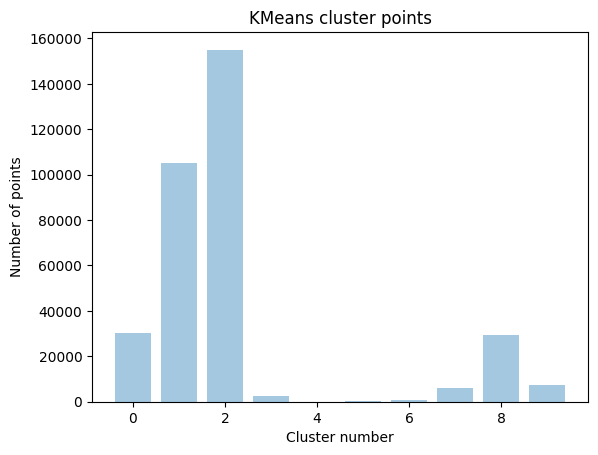

In [25]:
import matplotlib.pyplot as plt
plt.bar([x for x in range(10)], df.groupby(['Bow Clus Label'])['CleanedText'].count(), alpha = 0.4)
plt.title('KMeans cluster points')
plt.xlabel("Cluster number")
plt.ylabel("Number of points")
plt.show()

In [26]:
for i in range(10):
    print("A review of assigned to cluster ", i)
    print("-" * 70)
    print(df.iloc[df.groupby(['Bow Clus Label']).groups[1][6]]['CleanedText'])
    print('\n')
    print("_" * 70)

A review of assigned to cluster  0
----------------------------------------------------------------------
problem great durabl flip phone front screen still mine incas smartphon break


______________________________________________________________________
A review of assigned to cluster  1
----------------------------------------------------------------------
problem great durabl flip phone front screen still mine incas smartphon break


______________________________________________________________________
A review of assigned to cluster  2
----------------------------------------------------------------------
problem great durabl flip phone front screen still mine incas smartphon break


______________________________________________________________________
A review of assigned to cluster  3
----------------------------------------------------------------------
problem great durabl flip phone front screen still mine incas smartphon break


___________________________________________

In [27]:
#K means using tfidf
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vect = TfidfVectorizer()
tfidf = tfidf_vect.fit_transform(final['CleanedText'].values)
tfidf.shape

(336769, 46655)

In [28]:
from sklearn.cluster import KMeans
model_tf = KMeans(n_clusters = 10,random_state=99)
model_tf.fit(tfidf)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=10, random_state=99)

In [29]:
labels_tf = model_tf.labels_
cluster_center_tf=model_tf.cluster_centers_
cluster_center_tf

array([[1.64793517e-04, 1.52719991e-06, 1.08161753e-05, ...,
        2.91367223e-06, 2.01357726e-05, 6.35907454e-06],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [30]:
terms1 = tfidf_vect.get_feature_names_out()

In [31]:
terms1[1:10]

array(['aaaa', 'aaaaa', 'aaaaaa', 'aaaaaaaa', 'aaaaaaamaz', 'aaaaaand',
       'aaaaargh', 'aaaaaw', 'aaaalll'], dtype=object)

In [33]:
df1 = df
df1['Tfidf Clus Label'] = model_tf.labels_
df1.head(5)

<ipython-input-33-77a075ba889f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Tfidf Clus Label'] = model_tf.labels_


,Product Name,Brand Name,Price,Rating,Reviews,Review Votes,CleanedText,Bow Clus Label,Tfidf Clus Label
262126,"Nokia 7705 Twist Phone, Black (Verizon Wireles...",Nokia,87.99,positive,! am very satisfied with this phone. I had the...,1.0,satisfi phone phone broke year use abus like m...,1,6
81591,"ASUS ZenFone 2 Unlocked Cellphone, 64GB, Black...",Asus,235.16,positive,"!!!! Great phone move fast everything , but th...",0.0,great phone move fast everyth batteri poor,1,6
156366,BLU Studio XL Android Smartphone - GSM Unlocke...,BLU,99.99,positive,!!!!!Update!!!!! a year later and this phone h...,6.0,updat year later phone serious problem batteri...,3,6
165598,"Casio GzOne C731 Rock, Black (Verizon Wireless...",Casio,177.79,positive,!!!!THIS PHONE DOES NOT USE THE NEW STANDARD U...,0.0,phone use new standard usb type charger cant b...,9,6
348910,"Samsung Galaxy S5 G900F Unlocked Cellphone, In...",Samsung,328.99,positive,!!Buyer beware!! got screwed over with an impo...,0.0,buyer bewar got screw import bill perfect came...,2,0


In [34]:
df1.groupby(['Tfidf Clus Label'])['CleanedText'].count()

Tfidf Clus Label
0    143588
1     12775
2      7237
3     10576
4      7424
5      9934
6    124936
7      3234
8      2939
9     14126
Name: CleanedText, dtype: int64

In [35]:
print("Top terms per cluster:")
order_centroids = model_tf.cluster_centers_.argsort()[:, ::-1]
for i in range(10):
    print("Cluster %d:" % i, end='')
    for ind in order_centroids[i, :10]:
        print(' %s' % terms1[ind], end='')
        print()

Top terms per cluster:
Cluster 0: work
 good
 product
 like
 nice
 thank
 phone
 great
 use
 iphon
Cluster 1: good
 phone
 product
 price
 thank
 work
 far
 qualiti
 realli
 condit
Cluster 2: expect
 met
 phone
 work
 everyth
 meet
 great
 product
 good
 exceed
Cluster 3: excel
 product
 phone
 recommend
 thank
 good
 seller
 condit
 price
 love
Cluster 4: perfect
 work
 condit
 phone
 everyth
 thank
 great
 love
 new
 product
Cluster 5: love
 phone
 great
 daughter
 thank
 new
 wife
 work
 good
 son
Cluster 6: phone
 use
 work
 great
 good
 one
 like
 get
 batteri
 screen
Cluster 7: excelent
 producto
 gracia
 recomendado
 telefono
 celular
 teléfono
 product
 bueno
 muy
Cluster 8: awesom
 phone
 love
 price
 great
 thank
 product
 work
 fast
 camera
Cluster 9: great
 phone
 work
 product
 price
 condit
 thank
 fast
 buy
 good


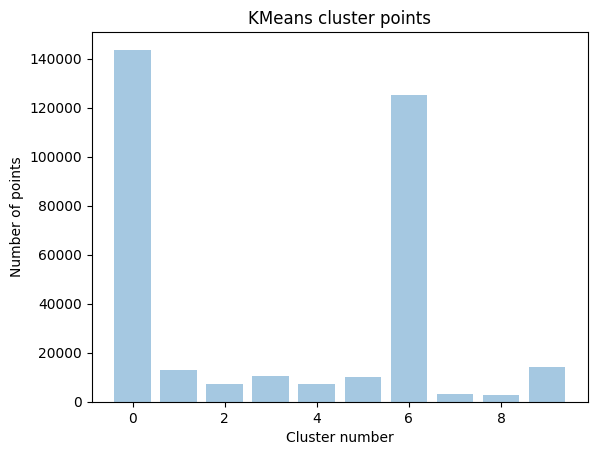

In [36]:
plt.bar([x for x in range(10)], df1.groupby(['Tfidf Clus Label'])['CleanedText'].count(), alpha = 0.4)
plt.title('KMeans cluster points')
plt.xlabel("Cluster number")
plt.ylabel("Number of points")
plt.show()

In [37]:
for i in range(10):
    print("4 review of assigned to cluster ", i)
    print("-" * 70)
    print(df1.iloc[df1.groupby(['Tfidf Clus Label']).groups[1][4]]['CleanedText'])
    print('\n')
    print(df1.iloc[df1.groupby(['Tfidf Clus Label']).groups[1][8]]['CleanedText'])
    print('\n')
    print(df1.iloc[df1.groupby(['Tfidf Clus Label']).groups[1][12]]['CleanedText'])
    print('\n')
    print("_" * 70)

4 review of assigned to cluster  0
----------------------------------------------------------------------
work great long time wouldnt updat reset wouldnt download app send pictur screenshot pay extra note worth


excel


came fair familiar nokia phone general symbian particular want touchscreen phone keyboard within budget would gone mini bit pricey consid come soon ive read almost avail review read onlin know your get phone thing surpris resist touchscreen bought phone expect return immedi touchscreen compar capacit ipod touch amaz respons accur expect need stylus nail navig phone realli dontit howev bit bulki compar pretti much nokiamap redunkul tho love last time check got nokia map back requir year rate use pretti much useless bec tri enter adddress requir zipcod entri search new interfac work much like googlemap esp ovi account much easier use featur ever want stand alon gps get phone along iti specif bought phone tri nokiamap rode motorcycl cant beat accur gps plug headphon blue

In [38]:
# Word to vector Clustering
i=0
list_of_sent=[]
for sent in final['CleanedText'].values:
    list_of_sent.append(sent.split())

In [39]:
print(final['CleanedText'].values[0])
print(list_of_sent[0])

satisfi phone phone broke year use abus like much want anoth happi abl purchas anoth like new condit happi happi
['satisfi', 'phone', 'phone', 'broke', 'year', 'use', 'abus', 'like', 'much', 'want', 'anoth', 'happi', 'abl', 'purchas', 'anoth', 'like', 'new', 'condit', 'happi', 'happi']


In [40]:
import re
def cleanhtml(sentence): #function to clean the word of any html-tags
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, ' ', sentence)
    return cleantext
def cleanpunc(sentence): #function to clean the word of any punctuation or special characters
    cleaned = re.sub(r'[?|!|\'|"|#]',r'',sentence)
    cleaned = re.sub(r'[.|,|)|(|\|/]',r' ',cleaned)
    return  cleaned


In [41]:
i=0
list_of_sent_train=[]
for sent in final['CleanedText'].values:
    filtered_sentence=[]
    sent=cleanhtml(sent)
    for w in sent.split():
        for cleaned_words in cleanpunc(w).split():
            if(cleaned_words.isalpha()):    
                filtered_sentence.append(cleaned_words.lower())
            else:
                continue 
    list_of_sent_train.append(filtered_sentence)

In [42]:
import gensim
#to train the wor2vec model using train dataset
w2v_model=gensim.models.Word2Vec(list_of_sent_train,workers=4)

In [43]:
import numpy as np
sent_vectors = []; # the avg-w2v for each sentence/review is stored in this train
for sent in list_of_sent_train: # for each review/sentence
    sent_vec = np.zeros(100) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sent: # for each word in a review/sentence
        try:
            vec = w2v_model.wv[word]
            sent_vec += vec
            cnt_words += 1
        except:
            pass
    sent_vec /= cnt_words
    sent_vectors.append(sent_vec)
sent_vectors = np.array(sent_vectors)
sent_vectors = np.nan_to_num(sent_vectors)
sent_vectors.shape

<ipython-input-43-162ab9b4d7a5>:13: RuntimeWarning: invalid value encountered in true_divide
  sent_vec /= cnt_words


(336769, 100)

In [44]:
num_clus = [x for x in range(3,11)]
num_clus

[3, 4, 5, 6, 7, 8, 9, 10]

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

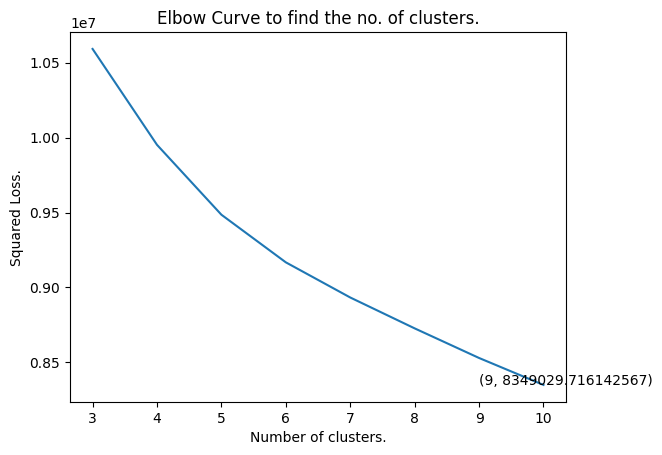

The optimal number of clusters obtained is -  9
The loss for optimal cluster is -  8349029.716142567


In [45]:
squared_errors = []
for cluster in num_clus:
    kmeans = KMeans(n_clusters = cluster).fit(sent_vectors) # Train Cluster
    squared_errors.append(kmeans.inertia_) # Appending the squared loss obtained in the list
    
optimal_clusters = np.argmin(squared_errors) + 2 # As argmin return the index of minimum loss. 
plt.plot(num_clus, squared_errors)
plt.title("Elbow Curve to find the no. of clusters.")
plt.xlabel("Number of clusters.")
plt.ylabel("Squared Loss.")
xy = (optimal_clusters, min(squared_errors))
plt.annotate('(%s, %s)' % xy, xy = xy, textcoords='data')
plt.show()

print ("The optimal number of clusters obtained is - ", optimal_clusters)
print ("The loss for optimal cluster is - ", min(squared_errors))

In [46]:
# Training the best model --
from sklearn.cluster import KMeans
model2 = KMeans(n_clusters = optimal_clusters)
model2.fit(sent_vectors)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=9)

In [47]:
word_cluster_pred=model2.predict(sent_vectors)
word_cluster_pred_2=model2.labels_
word_cluster_center=model2.cluster_centers_

In [ ]:
word_cluster_center[1:2]

In [48]:

dfa = df1
dfa['AVG-W2V Clus Label'] = model2.labels_
dfa.head(2)

<ipython-input-48-8c9df285eb70>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfa['AVG-W2V Clus Label'] = model2.labels_


,Product Name,Brand Name,Price,Rating,Reviews,Review Votes,CleanedText,Bow Clus Label,Tfidf Clus Label,AVG-W2V Clus Label
262126,"Nokia 7705 Twist Phone, Black (Verizon Wireles...",Nokia,87.99,positive,! am very satisfied with this phone. I had the...,1.0,satisfi phone phone broke year use abus like m...,1,6,6
81591,"ASUS ZenFone 2 Unlocked Cellphone, 64GB, Black...",Asus,235.16,positive,"!!!! Great phone move fast everything , but th...",0.0,great phone move fast everyth batteri poor,1,6,0


In [49]:
dfa.groupby(['AVG-W2V Clus Label'])['CleanedText'].count()

AVG-W2V Clus Label
0     45146
1    102325
2     12853
3      9703
4     28906
5      4408
6     74243
7      8377
8     50808
Name: CleanedText, dtype: int64

In [51]:
#DBSCAN Clustering
from sklearn.cluster import DBSCAN
minPts = 2 * 100
def lower_bound(nums, target): 
    l, r = 0, len(nums) - 1
    while l <= r: 
        mid = int(l + (r - l) / 2)
        if nums[mid] >= target:
            r = mid - 1
        else:
            l = mid + 1
    return l

def compute200thnearestneighbour(x, data):
    dists = []
    for val in data:
        dist = np.sum((x - val) **2 ) 
        if(len(dists) == 200 and dists[199] > dist):
          l = int(lower_bound(dists, dist))
          if l < 200 and l >= 0 and dists[l] > dist:
                dists[l] = dist
        else:
            dists.append(dist)
            dists.sort()
    
    return dists[199] 


In [52]:
twohundrethneigh = []
for val in sent_vectors[:1500]:
    twohundrethneigh.append( compute200thnearestneighbour(val, sent_vectors[:1500]) )
twohundrethneigh.sort()

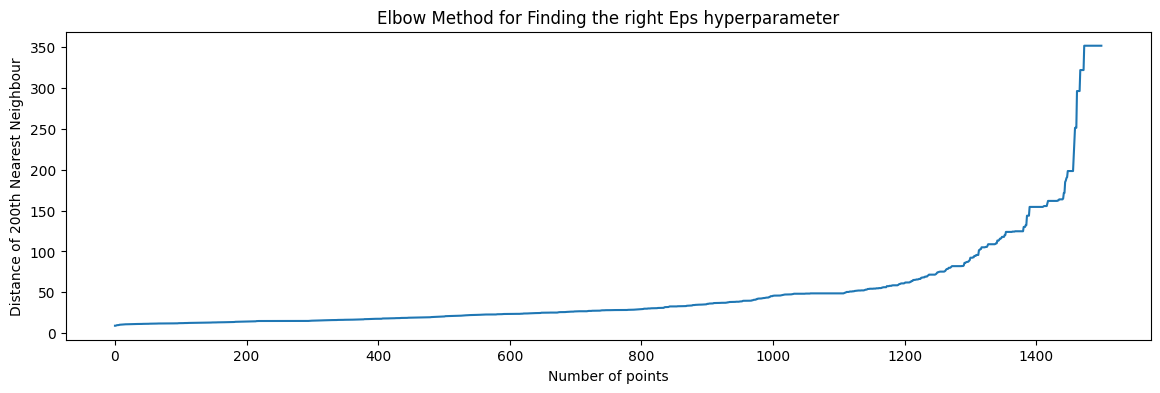

In [53]:
# Plotting for the Elbow Method :
plt.figure(figsize=(14,4))
plt.title("Elbow Method for Finding the right Eps hyperparameter")
plt.plot([x for x in range(len(twohundrethneigh))], twohundrethneigh)
plt.xlabel("Number of points")
plt.ylabel("Distance of 200th Nearest Neighbour")
plt.show()

In [54]:
#DBSCAN Clustering
from sklearn.cluster import DBSCAN

In [55]:
# Computing 200th Nearest neighbour distance
minPts = 2 * 100
def lower_bound(nums, target): 
    l, r = 0, len(nums) - 1
    while l <= r: # Binary searching.
        mid = int(l + (r - l) / 2)
        if nums[mid] >= target:
            r = mid - 1
        else:
            l = mid + 1
    return l

def compute200thnearestneighbour(x, data): 
    dists = []
    for val in data:
      dist = np.sum((x - val) **2 ) 
      if(len(dists) == 200 and dists[199] > dist): 
            l = int(lower_bound(dists, dist)) 
            if l < 200 and l >= 0 and dists[l] > dist:
                dists[l] = dist
      else:
            dists.append(dist)
            dists.sort()
    
    return dists[199] 

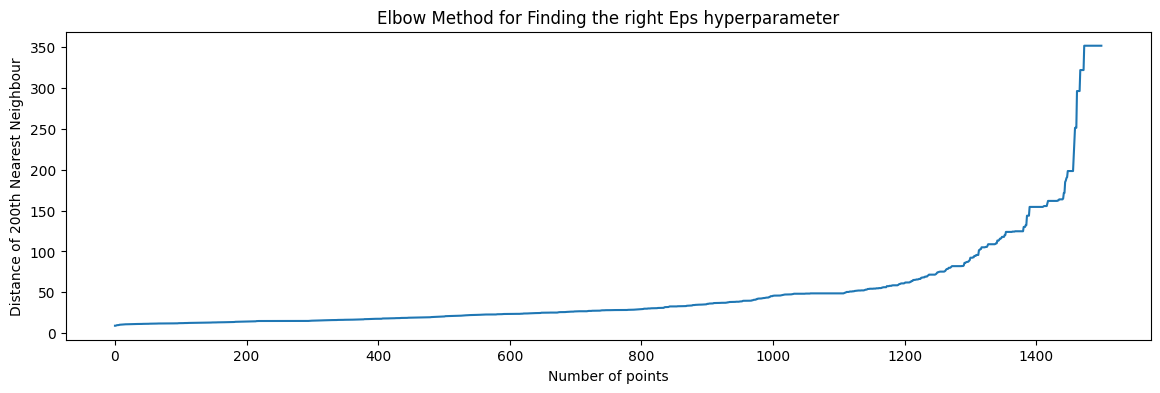

In [56]:
# Plotting for the Elbow Method :
import matplotlib.pyplot as plt
plt.figure(figsize=(14,4))
plt.title("Elbow Method for Finding the right Eps hyperparameter")
plt.plot([x for x in range(len(twohundrethneigh))], twohundrethneigh)
plt.xlabel("Number of points")
plt.ylabel("Distance of 200th Nearest Neighbour")
plt.show()

In [ ]:
dfdb.groupby(['AVG-W2V Clus Label'])['Id'].count()

In [ ]:
#Hierarchy clustering
import scipy
from scipy.cluster import hierarchy
dendro=hierarchy.dendrogram(hierarchy.linkage(sent_vectors,method='ward'))
plt.axhline(y=35)

In [ ]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward') 
Agg=cluster.fit_predict(sent_vectors)

In [ ]:
aggdfa = dfdb
aggdfa['AVG-W2V Clus Label'] = cluster.labels_
aggdfa.head(2)

In [ ]:
aggdfa.groupby(['AVG-W2V Clus Label'])['Text'].count()

In [ ]:
for i in range(5):
    print("2 reviews of assigned to cluster ", i)
    print("-" * 70)
    print(aggdfa.iloc[aggdfa.groupby(['AVG-W2V Clus Label']).groups[i][0]]['Text'])
    print('\n')
    print(aggdfa.iloc[aggdfa.groupby(['AVG-W2V Clus Label']).groups[i][1]]['Text'])
    print('\n')
    print("_" * 70)

In one paragraph, please compare K means, DBSCAN and Hierarchical clustering.

In [5]:
'''The distance between the data points and the clusters' centroids serves as the basis for K-means clustering. 
Clustering based on density is carried out using DBSCAN. 
Here, the most densely populated sections of the points are located and separated from open space. 
As the name implies, hierarchical clustering involves layer-based grouping. 
It starts by treating each data point as a distinct cluster and then identifies the two clusters that are most closely related.''' 

"The distance between the data points and the clusters' centroids serves as the basis for K-means clustering. \nClustering based on density is carried out using DBSCAN. \nHere, the most densely populated sections of the points are located and separated from open space. \nAs the name implies, hierarchical clustering involves layer-based grouping. \nIt starts by treating each data point as a distinct cluster and then identifies the two clusters that are most closely related."